<a href="https://colab.research.google.com/github/victwise/fastai_numerical_linear_algebra/blob/master/Cap%C3%ADtulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sources

*   https://sites.google.com/site/backgroundsubtraction/test-sequences



In [3]:
!pip install moviepy

    100% |████████████████████████████████| 378kB 22.0MB/s 
    100% |████████████████████████████████| 3.3MB 7.4MB/s 
  Running setup.py bdist_wheel for moviepy ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ad/92/4d/a6c6307d4c2219d002646bd4a5987e31fd5697f6ea7778b2c0
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built moviepy imageio


In [4]:
import moviepy.editor as mpe
from glob import glob

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1523712/45929032 bytes (3.3%)4808704/45929032 bytes (10.5%)8708096/45929032 bytes (19.0%)12206080/45929032 bytes (26.6%)15925248/45929032 bytes (34.7%)19824640/45929032 bytes (43.2%)23322624/45929032 bytes (50.8%)26959872/45929032 bytes (58.7%)30679040/45929032 bytes (66.8%)34406400/45929032 bytes (74.9%)38322176/45929032 bytes (83.4%)42139648/45929032 bytes (91.7%)

In [0]:
import sys
import numpy as np
import scipy

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
#MAX_ITERS = 10
Total = 1.0e-8

In [0]:
video = mpe.VideoFileClip("b00000.avi")

In [55]:
video.subclip(0,30).ipython_display(width=300)


100%|█████████▉| 300/301 [00:00<00:00, 1810.74it/s]


In [45]:
video.duration

31.2

##Métodos de Ayuda

In [0]:
def creando_matriz_de_video(clip, k=5, scala=30):
  return np.vstack([scipy.misc.imresize(rgb2gray(clip.get_frame(i/float(k))).astype(int), 
                      scala).flatten() for i in range(k * int(clip.duration))]).T

In [0]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])

In [0]:
def plt_images(M,A,E, index_array, dims, filename=None):
  f = plt.figure(figsize=(15,10))
  r = len(index_array)
  pics = r*3
  for k, i in enumerate(index_array):
    for j, mat in enumerate([M,A,E]):
      sp = f.add_subplot(r,3,3*k+j+1)
      sp.axis('Off')
      pixels = mat[:,i]
      if isinstance(pixels,scipy.sparse.csr_matrix):
        pixels = pixels.todense()
      plt.imshow(np.reshape(pixels,dims),cmap='gray')
  return f

In [0]:
def plots(ims, dims, figsize=(15,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        plt.imshow(np.reshape(ims[i], dims), cmap="gray")

##Carga y Visualización de datos

Una imagen de solo 1 momento en el tiempo es de 60 píxeles por 80 píxeles (cuando se escala). Podemos desenrollar esa imagen en una sola columna alta. Así que en lugar de tener una imagen 2D que es 60 × 80, tenemos un 1 × 4 , 800 columna

Esto no es muy fácil de leer, pero nos será útil porque nos permite apilar las imágenes de diferentes momentos una encima de la otra, para poner un video en una sola matriz. Si tomáramos la imagen de video cada décima de segundo durante 30 segundos (por lo que tendríamos 300 imágenes diferentes, cada una en un punto en el tiempo diferente), tendríamos una matriz de 300 × 4800, representando el video!

In [0]:
scala = 70   # Ajuste de la escala para cambiar la resolución de la imagen
dims = (int(120 * (scala/100)), int(160 * (scala/100)))

In [0]:
M = creando_matriz_de_video(video,100,scala)
# M = np.load("alta_resolucion_del_video_en_matriz.npy")

In [113]:
print(dims, M.shape)

(84, 112) (9408, 3100)


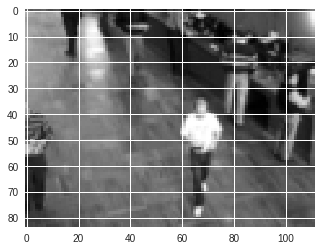

In [114]:
plt.imshow(np.reshape(M[:,3], dims), cmap='gray');

Como "creando_matriz_de_video" es algo lento, guardamos nuestra matriz. En general, siempre que tenga pasos de preprocesamiento lentos, es una buena idea guardar los resultados para un uso futuro.

In [0]:
np.save("baja_res_video_matriz.npy", M)

Nota: La alta resolución M hay veces que es demasiado grande para pasarlo a plot, así que lo mejor es ejecuta una versión resolución baja

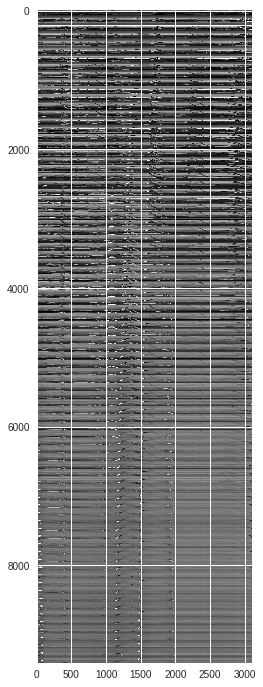

In [118]:
plt.figure(figsize=(6,12))
plt.imshow(M,cmap='gray')